In [1]:
#four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.

# Dependencies and Setup
#unfinished - Please slack for deadline extend 
#remove this note when finshed

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
drug_data = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_data = trial_data.merge(drug_data, on= "Mouse ID")

# Display the data table for preview
combined_data.head(15)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
5,b128,25,43.262145,1,Capomulin
6,b128,30,40.605335,1,Capomulin
7,b128,35,37.967644,1,Capomulin
8,b128,40,38.379726,2,Capomulin
9,b128,45,38.982878,2,Capomulin


In [2]:
select_data = combined_data[combined_data['Drug'].isin(["Capomulin", "Infubinol", "Ketapril","Placebo"])]
select_data.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
5,b128,25,43.262145,1,Capomulin
6,b128,30,40.605335,1,Capomulin
7,b128,35,37.967644,1,Capomulin
8,b128,40,38.379726,2,Capomulin
9,b128,45,38.982878,2,Capomulin


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
tumor_df = select_data.loc[:,["Timepoint", "Drug", "Tumor Volume (mm3)"]]

tumor_mean_volume = tumor_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()
tumor_mean_volume.head(20)

# Convert to DataFrame

tumor_volume_df = pd.DataFrame({"Tumor Volume Data":tumor_mean_volume})

# Preview DataFrame

tumor_volume_df.head(30)

tumor_volume_df_1 = tumor_volume_df.sort_values(by=["Drug","Timepoint"], ascending=True)

tumor_volume_df_1.head(15)




Tumor Volume Data
Drug      Timepoint                   
Capomulin 0                  45.000000
          5                  44.266086
          10                 43.084291
          15                 42.064317
          20                 40.716325
          25                 39.939528
          30                 38.769339
          35                 37.816839
          40                 36.958001
          45                 36.236114
Infubinol 0                  45.000000
          5                  47.062001
          10                 49.403909
          15                 51.296397
          20                 53.197691

In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

tumor_SE_volume = select_data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()
tumor_SE_volume

# Convert to DataFrame

tumor_SE_df = pd.DataFrame({"Tumor Volume Standard Error":tumor_SE_volume})
tumor_SE_df.head(18)

# Preview DataFrame
tumor_SE_df_1 = tumor_SE_df.sort_values(by=["Drug","Timepoint"], ascending=True)

tumor_SE_df_1.head(15)


Tumor Volume Standard Error
Drug      Timepoint                             
Capomulin 0                             0.000000
          5                             0.448593
          10                            0.702684
          15                            0.838617
          20                            0.909731
          25                            0.881642
          30                            0.934460
          35                            1.052241
          40                            1.223608
          45                            1.223977
Infubinol 0                             0.000000
          5                             0.235102
          10                            0.282346
          15                            0.357705
          20                            0.476210

In [5]:
# Minor Data Munging to Re-Format the Data Frame

tumor_drug = pd.pivot_table(tumor_df, index=["Timepoint"], values=["Tumor Volume (mm3)"], columns=["Drug"])

# Preview that Reformatting worked

tumor_drug

Tumor Volume (mm3)                                 
Drug               Capomulin  Infubinol   Ketapril    Placebo
Timepoint                                                    
0                  45.000000  45.000000  45.000000  45.000000
5                  44.266086  47.062001  47.389175  47.125589
10                 43.084291  49.403909  49.582269  49.423329
15                 42.064317  51.296397  52.399974  51.359742
20                 40.716325  53.197691  54.920935  54.364417
25                 39.939528  55.715252  57.678982  57.482574
30                 38.769339  58.299397  60.994507  59.809063
35                 37.816839  60.742461  63.371686  62.420615
40                 36.958001  63.162824  66.068580  65.052675
45                 36.236114  65.755562  70.662958  68.084082

<function matplotlib.pyplot.show(*args, **kw)>

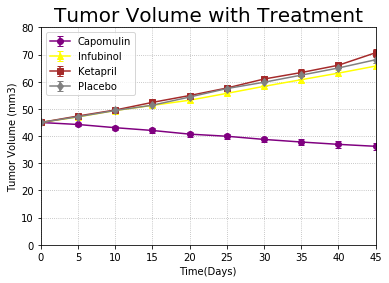

In [93]:
drug=["Capomulin","Infubinol","Ketapril","Placebo"]
colors=["purple","yellow","brown","gray"]
markers=["o","^","s","d"]

lines = []
drug=["Capomulin","Infubinol","Ketapril","Placebo"]

# Intializing the plots
fig, ax = plt.subplots()
ax.plot(label=drug)


for i in drug:
    # Setting 
    x_data=tumor_drug.index.values
    y_data=tumor_mean_volume[i]
    err=tumor_SE_volume[i]
    
    # Index for colors and markers
    index=drug.index(i)
    
    #  Plot
    ax.errorbar(x_data, y_data, err, linestyle="-", color=colors[index],
                marker=markers[index],capsize=3,capthick=1)
    # Setting the legend
    plt.legend(["Capomulin","Infubinol","Ketapril","Placebo"], loc='upper left', frameon=True)
  


plt.grid(linestyle='dotted')
# Setting the x_axis and y_axis limits
ax.set_xlim(0,45)
ax.set_ylim(0,80)
# Setting the title,x_axis and y_axis labels

ax.set_title("Tumor Volume with Treatment", fontsize=20)
ax.set_xlabel("Time(Days)")
ax.set_ylabel("Tumor Volume (mm3)")

plt.savefig("tumor_volume.png")

plt.show


![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

meta_df = select_data.loc[:,["Timepoint", "Drug", "Metastatic Sites"]]

meta_mean = meta_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()
meta_mean.head(20)

# Convert to DataFrame

meta_mean_df = pd.DataFrame({"Mean Metastatic Sites":meta_mean})



# Preview DataFrame
meta_mean_df.head(15)

Mean Metastatic Sites
Drug      Timepoint                       
Capomulin 0                       0.000000
          5                       0.160000
          10                      0.320000
          15                      0.375000
          20                      0.652174
          25                      0.818182
          30                      1.090909
          35                      1.181818
          40                      1.380952
          45                      1.476190
Infubinol 0                       0.000000
          5                       0.280000
          10                      0.666667
          15                      0.904762
          20                      1.050000

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

meta_sem = meta_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()
meta_mean.head(20)

# Convert to DataFrame

meta_sem_df = pd.DataFrame({"Mean Metastatic Sites":meta_sem})

# Preview DataFrame

meta_sem_df.head(15)

Mean Metastatic Sites
Drug      Timepoint                       
Capomulin 0                       0.000000
          5                       0.074833
          10                      0.125433
          15                      0.132048
          20                      0.161621
          25                      0.181818
          30                      0.172944
          35                      0.169496
          40                      0.175610
          45                      0.202591
Infubinol 0                       0.000000
          5                       0.091652
          10                      0.159364
          15                      0.194015
          20                      0.234801

In [9]:
# Minor Data Munging to Re-Format the Data Frames
meta_drug = pd.pivot_table(meta_df, index=["Timepoint"], values=["Metastatic Sites"], columns=["Drug"])

# Preview that Reformatting worked
meta_drug.head(15)

Metastatic Sites                              
Drug             Capomulin Infubinol  Ketapril   Placebo
Timepoint                                               
0                 0.000000  0.000000  0.000000  0.000000
5                 0.160000  0.280000  0.304348  0.375000
10                0.320000  0.666667  0.590909  0.833333
15                0.375000  0.904762  0.842105  1.250000
20                0.652174  1.050000  1.210526  1.526316
25                0.818182  1.277778  1.631579  1.941176
30                1.090909  1.588235  2.055556  2.266667
35                1.181818  1.666667  2.294118  2.642857
40                1.380952  2.100000  2.733333  3.166667
45                1.476190  2.111111  3.363636  3.272727

<function matplotlib.pyplot.show(*args, **kw)>

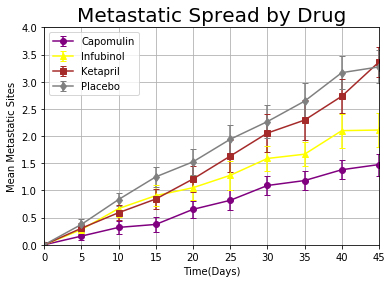

In [10]:
# Generate the Plot (with Error Bars)
drug=["Capomulin","Infubinol","Ketapril","Placebo"]
colors=["purple","yellow","brown","gray"]
markers=["o","^","s","d"]

lines = []
drug=["Capomulin","Infubinol","Ketapril","Placebo"]

# Intializing the plots
fig, ax = plt.subplots()
ax.plot(label=drug)


for i in drug:
    # Setting 
    x_data=tumor_drug.index.values
    y_data=meta_mean[i]
    err=meta_sem[i]
    
    # Index for colors and markers
    index=drug.index(i)
    
    #  Plot
    ax.errorbar(x_data, y_data, err, linestyle="-", color=colors[index],
                marker=markers[index],capsize=3,capthick=1)
    # Setting the legend
    plt.legend(["Capomulin","Infubinol","Ketapril","Placebo"], loc='upper left', frameon=True)
  

  
plt.grid(linestyle="-")
# Setting the x_axis and y_axis limits
ax.set_xlim(0,45)
ax.set_ylim(0,4)
# Setting the title,x_axis and y_axis labels

ax.set_title("Metastatic Spread by Drug", fontsize=20)
ax.set_xlabel("Time(Days)")
ax.set_ylabel("Mean Metastatic Sites")



# Save the Figure
plt.savefig("metastatic_spread.png")
# Show the Figure
plt.show

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_df = select_data.loc[:,["Timepoint", "Drug", "Mouse ID"]]

mouse_count = mouse_df.groupby(["Drug","Timepoint"])["Mouse ID"].count()
mouse_count.head(15)

# Convert to DataFrame

mouse_count_df = pd.DataFrame({"Mouse Count":mouse_count})

# Preview DataFrame
mouse_count_df.head(15)

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23
          25                  22
          30                  22
          35                  22
          40                  21
          45                  21
Infubinol 0                   25
          5                   25
          10                  21
          15                  21
          20                  20

In [12]:
# Minor Data Munging to Re-Format the Data Frames
mouse_drug = pd.pivot_table(mouse_count_df, index=["Timepoint"], values=["Mouse Count"], columns=["Drug"])

# Preview the Data Frame
mouse_drug.head(15)

Mouse Count                           
Drug        Capomulin Infubinol Ketapril Placebo
Timepoint                                       
0                  25        25       25      25
5                  25        25       23      24
10                 25        21       22      24
15                 24        21       19      20
20                 23        20       19      19
25                 22        18       19      17
30                 22        17       18      15
35                 22        12       17      14
40                 21        10       15      12
45                 21         9       11      11

In [13]:
#calculate survival rates(%)

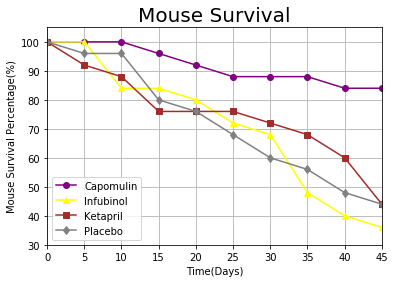

In [14]:
# Generate the Plot (Accounting for percentages)
drug=["Capomulin","Infubinol","Ketapril","Placebo"]
colors=["purple","yellow","brown","gray"]
markers=["o","^","s","d"]

lines = []
drug=["Capomulin","Infubinol","Ketapril","Placebo"]

# Intializing the plots
fig, ax = plt.subplots()
ax.plot(label=drug)


for i in drug:
    # Setting 
    x_data=mouse_drug.index.values
    y_data=(mouse_count[i]*100)/mouse_count[i][0]

    
    # Index for colors and markers
    index=drug.index(i)
    
    # Plot
    ax.errorbar(x_data, y_data, linestyle="-", color=colors[index],
                marker=markers[index],capsize=3,capthick=1)
    # legend
    plt.legend(["Capomulin","Infubinol","Ketapril","Placebo"], loc='lower left', frameon=True)
  

  
plt.grid(linestyle="-")
# Setting the x_axis and y_axis limits
ax.set_xlim(0,45)
ax.set_ylim(30,105)
# Setting the title,x_axis and y_axis labels

ax.set_title("Mouse Survival", fontsize=20)
ax.set_xlabel("Time(Days)")
ax.set_ylabel("Mouse Survival Percentage(%)")



# Save the Figure
plt.savefig("Mouse Survival.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [23]:
# Calculate the percent changes for each drug

changes = (tumor_drug.iloc[9,:] - tumor_drug.iloc[0,:]) / tumor_drug.iloc[0,:] * 100
changes

# Renaming the column

changes_df = pd.DataFrame({"Volume Change(%)":changes})


# Display the data to confirm
changes_df


Volume Change(%)
                   Drug                       
Tumor Volume (mm3) Capomulin        -19.475303
                   Infubinol         46.123472
                   Ketapril          57.028795
                   Placebo           51.297960

In [73]:
changes_values = changes_df.values


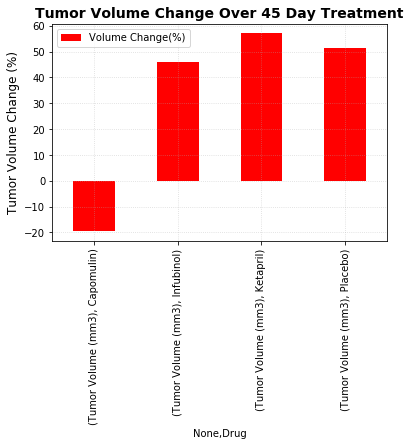

In [92]:
#changes_df['Volume Change(%)'].value_counts()


drug=["Capomulin","Infubinol","Ketapril","Placebo"]
    

ax = changes_df.plot(kind='bar', color="red")


ax.set_ylabel("Tumor Volume Change (%)",fontsize=12)
plt.grid(linestyle='dotted',alpha=0.5)
ax.set_title("Tumor Volume Change Over 45 Day Treatment",fontsize=14,fontweight='bold')

#README!!

#<rant>i have spent countless hours(i'm not joking, over 7 spread over several days) on this one bar graph and i cant find
#any good tutorials on how to change bar color based on value that actually work. 
#i know i can use if/then or for i and ive tried a million variations but i cant get the code to work and 
#there are only so many hours i can spend on one bar chart after a very long homework assignment already
#if there are any good resources on this you could point me to and i could fix it to up my grade i would be happy to but 
#right now i have to give up this fightbecause its mission impossible: "destination no where" up in here </rant>

#Please see last in for 3 analysis points 



# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)

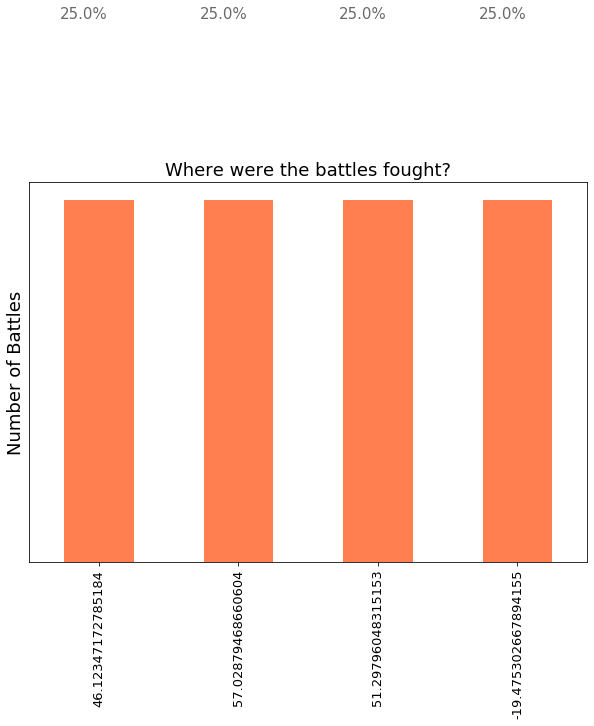

In [86]:
#Obs#1: Tumor Volume shows a decrease with only 1 drug: Capomulin
#Obs#2: All drugsw continued increase in metastatic sights, however, Capomulin has the smallest spread 
#obs#3 Mouse death and tumor volume (increase/decrease) are about the same plecebo in all drugs compared except 
#capomulin.  Metatstatic spread is slightly lower with infubinol.  given all data , only 
#capomulin seems to be a possible treatment (in comparison to plecebo)